In [251]:
import math
import numpy as np
import random
from random import choices
from typing import TypeVar,List
from sortedcontainers import SortedSet
import heapq
import numpy as np
import matplotlib.pyplot as plt
import collections
import time
from colorama import init, Fore

In [333]:
class cell:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.b = False
        self.g = 0
        self.f = 0
        self.h = 0
        self.p = 0
        self.h_new = 0
        self.pointer = None
    def __lt__(self, other: cell) -> bool:
        if((self.f) != (other.f)):
            return (self.f) < (other.f)
        else:
            return self.g > other.g
    def set_hval(self,t_x,t_y):
        self.h = abs(t_x - self.x) + abs(t_y - self.y)
        self.f = self.g + self.h
    def set_fvalAdap(self):
        self.f = self.h + self.g

In [8]:
class maze:
    def __init__(self,rows,columns,sx,sy,tx,ty,probability):
        self.rows = rows
        self.columns = columns
        self.sx = sx
        self.sy = sy
        self.tx = tx
        self.ty = ty
        self.visited = [[False for i in range(self.rows)] for j in range(self.columns)]
        self.options = ['b','u']
        self.weights = [probability,1-probability]
        self.drow = [0, 1, 0, -1]
        self.dcol = [-1, 0, 1, 0]
        #p = choices(self.options,self.weights)
        #print(p)
        self.mz = [] 
        for i in range(self.rows):
            arr = []
            for j in range(self.columns):
                c = cell(i,j)
                arr.append(c)
            self.mz.append(arr)            
    def isValid(self,r,c):
        if (r < 0 or c < 0 or r >= self.rows or c >= self.columns):
            return False
        if (self.visited[r][c]):
            return False
        return True
    def DFS(self,grid,sx,sy,tx,ty):
        stk = []
        stk.append([sx, sy])
        while(len(stk)>0):
            curr = stk[len(stk) - 1]
            stk.remove(stk[len(stk) - 1])
            r = curr[0]
            c = curr[1]
            if(self.isValid(r, c) == False):
                continue
            p = choices(self.options,self.weights)
            self.visited[r][c] = True
            if((r!= sx or c != sy) and (r!=tx or c != ty)):
                if(p[0] == 'b'):
                    self.mz[r][c].b = True
            for i in range(4):
                adjx = r + self.drow[i]
                adjy = c + self.dcol[i]
                stk.append([adjx, adjy])


In [274]:
grid_worlds = []
for i in range(50):
    grid_world = maze(101,101,0,0,100,100,0.3)
    grid_world.DFS([],0,0,100,100)
    grid_worlds.append(grid_world)

In [336]:
def getPath(start_cell_ind,parent_dict,curr_cell): 
    path = []
    curr = curr_cell
    while (curr.x, curr.y) != (start_cell_ind[0], start_cell_ind[1]):
        path.append([curr.x, curr.y])
        curr = parent_dict[(curr.x, curr.y)]
    path.append([curr.x,curr.y])
    return path[::-1]

In [338]:
def Astar(grid,start_cell_ind,goal_cell_ind, weight = 1):
    cells_processed = 0 
    start_cell = grid[start_cell_ind[0]][start_cell_ind[1]] 
    goal_cell = grid[goal_cell_ind[0]][goal_cell_ind[1]] 
    drow = [0, 1, 0, -1]
    dcol = [-1, 0, 1, 0]
    open_list = list()
    close_list = set() 
    parent_dict = {} 
    visited = set() 
    start_cell.g = 0 
    start_cell.set_hval(goal_cell_ind[0], goal_cell_ind[1])
    heapq.heappush(open_list,start_cell) 
    visited.add((start_cell.x, start_cell.y)) 
    while len(open_list)>0: 
        cl = heapq.heappop(open_list)
        curr_cell = grid[cl.x][cl.y]
        cells_processed += 1
        close_list.add((curr_cell.x, curr_cell.y)) 
        if curr_cell == goal_cell: 
            path = getPath(start_cell_ind,parent_dict,curr_cell)
            return path, cells_processed
        children = [] 
        for i in range(4):
            new_cell = (curr_cell.x+drow[i], curr_cell.y+dcol[i]) 
            if(new_cell[0] > len(grid)-1 or new_cell[1] > len(grid)-1 or new_cell[0] < 0 or new_cell[1] < 0 or grid[new_cell[0]][new_cell[1]].b or (new_cell[0], new_cell[1]) in close_list):
                continue
            if((new_cell[0], new_cell[1]) in visited):
                if curr_cell.g + 1 + grid[new_cell[0]][new_cell[1]].h < grid[new_cell[0]][new_cell[1]].f:
                    removalCell = grid[new_cell[0]][new_cell[1]]
                    open_list.remove(removalCell)
                    removalCell.g = curr_cell.g+1
                    removalCell.set_hval(goal_cell_ind[0], goal_cell_ind[1])
                    heapq.heappush(open_list,removalCell)                                
                    parent_dict[(new_cell[0],new_cell[1])] = curr_cell 
            else:
                grid[new_cell[0]][new_cell[1]].g = curr_cell.g + 1
                grid[new_cell[0]][new_cell[1]].set_hval(goal_cell_ind[0], goal_cell_ind[1])
                children.append(grid[new_cell[0]][new_cell[1]])
                parent_dict[(new_cell[0],new_cell[1])] = curr_cell
        if(children == []):
            continue
        for child in children: 
            heapq.heappush(open_list,child)                                        
            visited.add((child.x, child.y))
    return [], 0

In [318]:
def display_maze(m,start_cell_ind, goal_cell_ind):
    sx = start_cell_ind[0]
    sy = start_cell_ind[1]
    tx = goal_cell_ind[0]
    ty = goal_cell_ind[1]
    l = []
    for i in range(101):
        a = []
        for j in range(101):
            if(i == sx and j == sy):
                a.append(3)
                #print(Fore.BLUE, f's', end="")
            elif(i == tx and j == ty):
                a.append(2)
                #print(Fore.BLUE, f't', end="")
            elif m[i][j].b:
                a.append(1)
                #print(i,j)
                #print(Fore.RED, f'x', end="")
            elif m[i][j].p:
                a.append(5)
            else:
                a.append(0)
                #print(Fore.GREEN, f'-', end="")
        l.append(a)
        
        #print('\n')
        #figsize = (20,10)
    plt.figure()
    plt.imshow(l, cmap='hot', interpolation='nearest')

In [296]:
def final_path(path,agent_env,real_mz,start_cell_ind, goal_cell_ind):
    drow = [0, 1, 0, -1]
    dcol = [-1, 0, 1, 0]
    for index in range(len(path)):
        x_ind = path[index][0]
        y_ind = path[index][1]
        agent_env[x_ind][y_ind].x = real_mz[x_ind][y_ind].x
        agent_env[x_ind][y_ind].y = real_mz[x_ind][y_ind].y
        agent_env[x_ind][y_ind].b = real_mz[x_ind][y_ind].b
        agent_env[x_ind][y_ind].p = 1
        #print(agent_env[x_ind][y_ind].f)
        if(real_mz[x_ind][y_ind].b):
            #display_maze(real_mz,start_cell_ind, goal_cell_ind)
            return path[:index]
        for new_cell in range(4):
            child_pos = (x_ind+drow[new_cell], y_ind+dcol[new_cell])
            if(child_pos[0] > len(real_mz)-1 or child_pos[1] > len(real_mz)-1 or child_pos[0] < 0 or child_pos[1] < 0):
                continue
            agent_env[child_pos[0]][child_pos[1]].x = real_mz[child_pos[0]][child_pos[1]].x
            agent_env[child_pos[0]][child_pos[1]].y = real_mz[child_pos[0]][child_pos[1]].y
            agent_env[child_pos[0]][child_pos[1]].b = real_mz[child_pos[0]][child_pos[1]].b
    #display_maze(real_mz,start_cell_ind, goal_cell_ind)
    #display_maze(agent_env,start_cell_ind, goal_cell_ind)
    return path

In [295]:
def computePath(agent_env,real_mz,start_cell_ind, goal_cell_ind):
    paths = []
    counter = 0
    x = 0
    while(1):
        counter += 1
        path,c = Astar(agent_env,start_cell_ind,goal_cell_ind)
        paths.append(path)
        x += c
        #print(pathA)
        if(path == []):
            print("I cannot reach the target")
            display_maze(agent_env,start_cell_ind,goal_cell_ind)
            print("cells processed")
            print(x)
            break
        else:
            p = final_path(path,agent_env,real_mz,start_cell_ind, goal_cell_ind)
            if(p[-1] == goal_cell_ind):
                print("I reached the target")
                print("final")
                print("-------")
                display_maze(agent_env,start_cell_ind,goal_cell_ind)
                print("cells processed")
                print(x)
                return paths
            else:
                start_cell_ind = p[-1]
                #if(counter%5 == 0):
                    #display_maze(agent_env,start_cell_ind,goal_cell_ind)

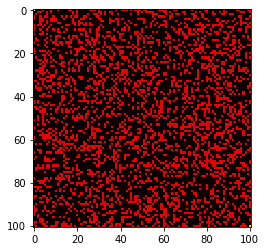

In [319]:
display_maze(grid_worlds[27].mz,[0,0],[100,100])

I reached the target
final
-------
cells processed
15689
0.26755809783935547
[[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 0], [73, 0], [74, 0], [75, 0], [76, 0], [77, 0], [78, 0], [79, 0], [80, 0], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 0], [89, 0], [90, 0], [91, 0], [92, 0], [93, 0], [94, 0], [95, 0], [96, 0], [97, 0], [98, 0], [99, 0], [100, 0], [100, 1], [100, 2], [

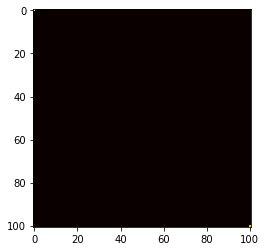

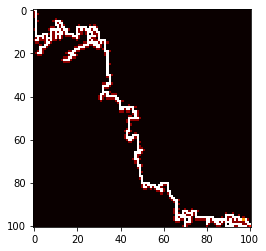

In [361]:
agent_env = maze(101,101,0,0,100,100,0)
agent_env.DFS([],0,0,100,100)
display_maze(agent_env.mz,[0,0],[100,100])
start = time.time()
paths = computePath(agent_env.mz,grid_worlds[40].mz,[0,0],[100,100])
end = time.time()
print(end -start)
print(paths)

In [351]:
def getPathAdap(start_cell_ind,parent_dict,curr_cell,grid): 
    path = []
    curr = curr_cell
    gs = grid[curr.x][curr.y].g
    while (curr.x, curr.y) != (start_cell_ind[0], start_cell_ind[1]):
        path.append([curr.x, curr.y])
        curr = parent_dict[(curr.x, curr.y)]
    path.append([curr.x,curr.y])
    return path[::-1],gs

In [352]:
def AdaptiveAstar(grid,start_cell_ind,goal_cell_ind, weight = 1):
    cells_processed = 0 
    start_cell = grid[start_cell_ind[0]][start_cell_ind[1]] 
    goal_cell = grid[goal_cell_ind[0]][goal_cell_ind[1]] 
    drow = [0, 1, 0, -1]
    dcol = [-1, 0, 1, 0]
    open_list = list()
    close_list = set() 
    parent_dict = {} 
    visited = set() 
    start_cell.g = 0
    start_cell.set_fvalAdap()
    heapq.heappush(open_list,start_cell) 
    
    visited.add((start_cell.x, start_cell.y)) 
    
    while len(open_list)>0: 
        cl = heapq.heappop(open_list)
        curr_cell = grid[cl.x][cl.y]
        cells_processed += 1 
        close_list.add((curr_cell.x, curr_cell.y)) 
        if curr_cell == goal_cell: 
            path, gs = getPathAdap(start_cell_ind,parent_dict,curr_cell,grid)
            for val in close_list:
                grid[val[0]][val[1]].h = gs - grid[val[0]][val[1]].g
            return path, cells_processed
        children = [] 
        for i in range(4): 
            new_cell = (curr_cell.x+drow[i], curr_cell.y+dcol[i]) 
            if(new_cell[0] > len(grid)-1 or new_cell[1] > len(grid)-1 or new_cell[0] < 0 or new_cell[1] < 0 or grid[new_cell[0]][new_cell[1]].b or (new_cell[0], new_cell[1]) in close_list):
                continue
            if((new_cell[0], new_cell[1]) in visited):
                if curr_cell.g + 1 + grid[new_cell[0]][new_cell[1]].h < grid[new_cell[0]][new_cell[1]].f:
                    removalCell = grid[new_cell[0]][new_cell[1]]
                    open_list.remove(removalCell)
                    removalCell.g = curr_cell.g+1
                    removalCell.set_fvalAdap()
                    heapq.heappush(open_list,removalCell)                                
                    parent_dict[(new_cell[0],new_cell[1])] = curr_cell 
            else:
                grid[new_cell[0]][new_cell[1]].g = curr_cell.g + 1
                grid[new_cell[0]][new_cell[1]].set_fvalAdap()
                children.append(grid[new_cell[0]][new_cell[1]])
                parent_dict[(new_cell[0],new_cell[1])] = curr_cell
        if(children == []): 
            continue
        for child in children: 
            heapq.heappush(open_list,child)                                        
            visited.add((child.x, child.y))
    return [], 0

In [349]:
def computePath_AdaptiveAstar(agent_env,real_mz,start_cell_ind, goal_cell_ind):
    paths = []
    counter = 0
    x = 0
    while(1):
        counter += 1
        path,c = AdaptiveAstar(agent_env,start_cell_ind,goal_cell_ind)
        x += c
        paths.append(path)
        if(path == []):
            print("I cannot reach the target")
            print("cells processed")
            print(x)
            break
        else:
            p = final_path(path,agent_env,real_mz,start_cell_ind, goal_cell_ind)
            if(p[-1] == goal_cell_ind):
                print("I reached the target")
                print("final")
                display_maze(agent_env,start_cell_ind,goal_cell_ind)
                print("cells processed")
                print(x)
                return paths
            else:
                start_cell_ind = p[-1]
                #if(counter%5 == 0):
                    #display_maze(agent_env,start_cell_ind,goal_cell_ind)

I reached the target
final
cells processed
19108
0.499133825302124
[[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [58, 1], [59, 1], [60, 1], [61, 1], [61, 2], [62, 2], [63, 2], [63, 3], [63, 4], [64, 4], [64, 5], [65, 5], [65, 6], [66, 6], [66, 7], [67, 7], [68, 7], [69, 7], [69, 8], [69, 9], [69, 10], [69, 11], [69, 12], [69, 13], [69, 14], [69, 15], [69, 16], [69, 17], [69, 18], [69, 19], [69, 20], [69, 21], [69, 22], [69, 23], [69, 24], [69, 25], [69, 26], [69, 27], [69, 28], [70, 28], [71, 28], [72, 28], [72, 29], 

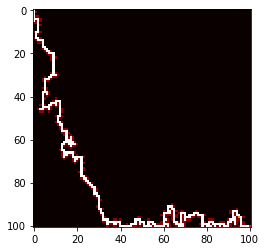

In [353]:
Adagent_env = maze(101,101,0,0,100,100,0)
Adagent_env.DFS([],0,0,100,100)
#display_maze(Adagent_env.mz,[0,0],[100,100])
start = time.time()
path = computePath_AdaptiveAstar(Adagent_env.mz,grid_worlds[15].mz,[0,0],[100,100])
end = time.time()
print(end - start)
print(path)